<a href="https://colab.research.google.com/github/GustavoHDLC1/Colab_Files_PADP/blob/main/Sem2_Practica7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Enlace GitHub](https://github.com/GustavoHDLC1/Colab_Files_PADP/blob/main/Sem2_Practica7.ipynb)

In [1]:
import pandas as pd
import seaborn as sns

## 1.- Carga y Exploración del Dataset

In [2]:
# Cargar el dataset Iris utilizando seaborn o cualquier otro dataset de su elección.
df = sns.load_dataset('iris')

In [3]:
# Verificar las primeras filas del dataset con el método .head().
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Obtener información general sobre los datos (nombres de columnas, tipos de datos, valores nulos, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Crear los siguientes gráficos con Matplotlib:

a) Gráfico de barras:
* Objetivo: Comparar el promedio de largo y ancho de los pétalos entre las tres especies de Iris.
* Instrucciones: Utiliza un gráfico de barras para mostrar la media de las columnas petal_length y petal_width agrupadas por species.

In [5]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [6]:
aux_1 = df.groupby('species').agg({'petal_length':'mean','petal_width':'mean'}).reset_index()
aux_1

,species,petal_length,petal_width
0,setosa,1.462,0.246
1,versicolor,4.260,1.326
2,virginica,5.552,2.026


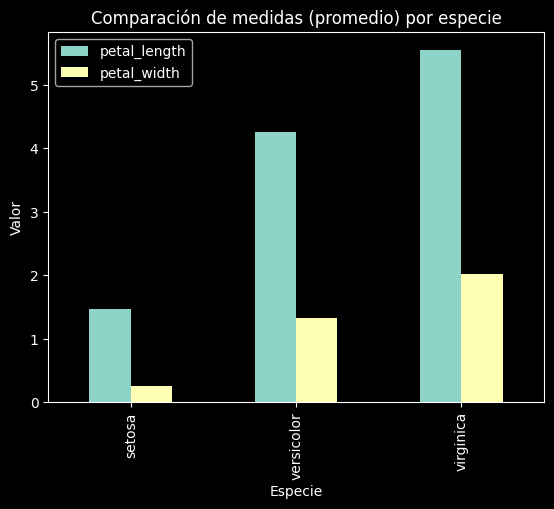

In [7]:
aux_1.plot(x="species", y=["petal_length", "petal_width"], kind="bar")
plt.title("Comparación de medidas (promedio) por especie")
plt.xlabel("Especie")
plt.ylabel("Valor")
plt.show()

b) Histograma:

* Objetivo: Visualizar la distribución de los largos de los sépalos (sepal_length).
* Instrucciones: Crea un histograma de la variable sepal_length y asegúrate de que tenga un número adecuado de bins. Coloca etiquetas en los ejes y un título.

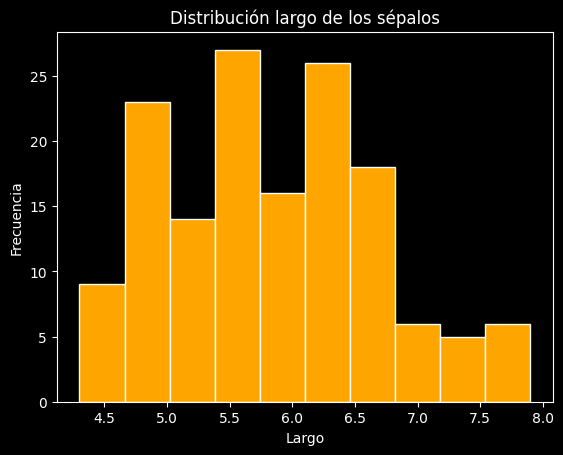

In [8]:
df["sepal_length"].plot(kind="hist", bins=10, color="orange", edgecolor="white")
plt.title("Distribución largo de los sépalos")
plt.xlabel("Largo")
plt.ylabel("Frecuencia")
plt.show()

c) Gráfico de dispersión (scatter plot):

* Objetivo: Relacionar el largo del pétalo con el ancho del pétalo.
* Instrucciones: Crea un gráfico de dispersión que compare petal_length con petal_width. Usa un color diferente para cada especie.

In [9]:
colores = {'setosa': 'yellow', 'versicolor': 'orange', 'virginica': 'cyan'}
df['Color'] = df['species'].map(colores)

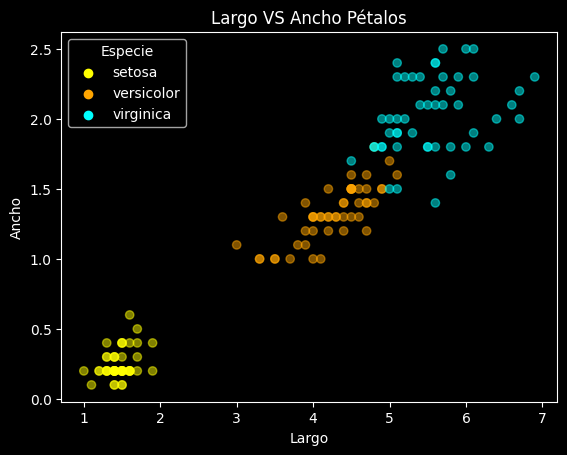

In [10]:
plt.scatter(df['petal_length'], df['petal_width'], alpha=0.5, c=df['Color'])
plt.title("Largo VS Ancho Pétalos")
plt.xlabel("Largo")
plt.ylabel("Ancho")
for especie, color in colores.items():
    plt.scatter([], [], color=color, label=especie)
plt.legend(title="Especie")
plt.show()

d) Gráfico de cajas (box plot):

* Objetivo: Analizar la distribución de las medidas del sépalo (sepal_length, sepal_width).
* Instrucciones: Crea un gráfico de cajas para mostrar la distribución de las variables sepal_length y sepal_width por especie.

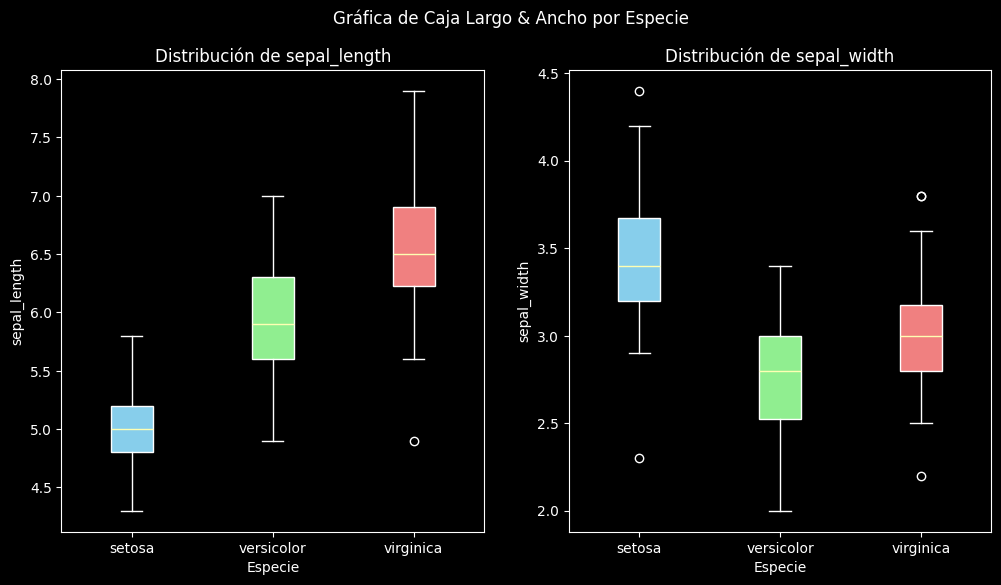

In [11]:
# Variables a graficar
variables = ["sepal_length", "sepal_width"]
species = df["species"].unique()

# Configurar la figura para mostrar las gráficas
fig, axes = plt.subplots(1, 2, figsize=(12,6))  # 1 fila, 2 columnas

colores = ["skyblue", "lightgreen", "lightcoral"]

for i, var in enumerate(variables):
    # Separar los datos por especie
    datos_graficar = [df[df["species"] == sp][var] for sp in species]

    # Crear boxplot
    box_p = axes[i].boxplot(datos_graficar, tick_labels=species, patch_artist=True)

    # Colorear cada caja
    for patch, color in zip(box_p['boxes'], colores):
        patch.set_facecolor(color)

    axes[i].set_title(f"Distribución de {var}")
    axes[i].set_xlabel("Especie")
    axes[i].set_ylabel(var)

plt.suptitle("Gráfica de Caja Largo & Ancho por Especie")
plt.show()

e) Gráfico de líneas:

* Objetivo: Mostrar la tendencia de la longitud del pétalo (petal_length) a través de las observaciones.
* Instrucciones: Crea un gráfico de líneas utilizando la variable petal_length (en el eje Y) con el índice de las observaciones (en el eje X). Puedes hacer esto para ver cómo varía la longitud del pétalo a lo largo del dataset.

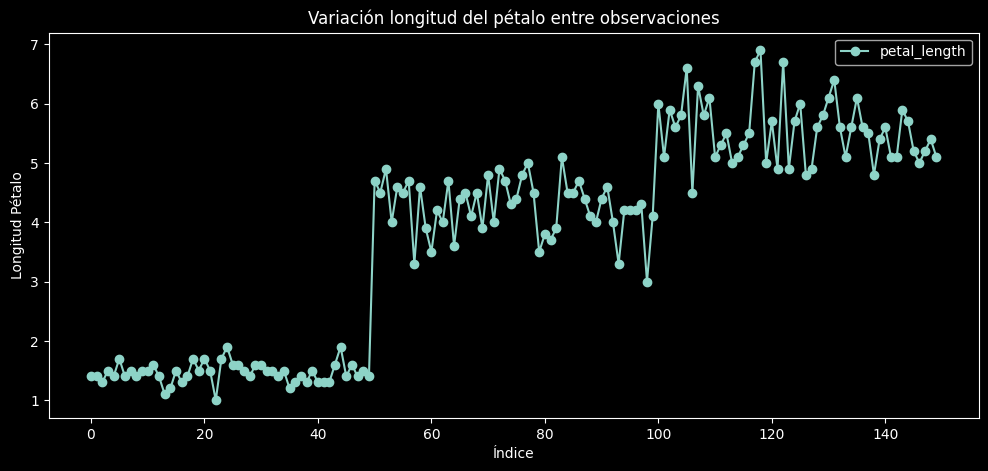

In [12]:
df.plot(y=["petal_length"], marker="o", figsize=(12,5))  # x automático = índice
plt.title("Variación longitud del pétalo entre observaciones")
plt.xlabel("Índice")
plt.ylabel("Longitud Pétalo")
plt.show()